# importing libraries

In [2]:
import pandas as pd

In [3]:
import tensorflow

In [4]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dropout , BatchNormalization,Dense
from keras.callbacks import EarlyStopping
from keras import regularizers

In [5]:
# load the dataset
df = pd.read_csv("loan_approval_dataset.csv")
# see top 5 rows
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [6]:
# shape of the dataset
df.shape

(4269, 13)

In [7]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


# DATA PREPROCESSING

In [10]:
# check missing values
df.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [13]:
df.columns = df.columns.str.strip()

In [15]:
df = pd.get_dummies(df,columns = ['education','self_employed','loan_status'],drop_first = True , dtype = 'int32')
df.head()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Not Graduate,self_employed_ Yes,loan_status_ Rejected
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0,0
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1,1
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0,1
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0,1
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1,1


In [16]:
# separate and labels features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [17]:
X

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Not Graduate,self_employed_ Yes
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1000000,2300000,12,317,2800000,500000,3300000,800000,0,1
4265,4266,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1,1
4266,4267,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1,0
4267,4268,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,1,0


In [18]:
from sklearn.model_selection import train_test_split
X_train , X_test,y_train,y_test = train_test_split(X,y , random_state = 42,test_size = 0.2)

In [19]:
X_train

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Not Graduate,self_employed_ Yes
1675,1676,5,7900000,29900000,6,568,5800000,13900000,15900000,8700000,1,0
1164,1165,0,9600000,34000000,12,710,23800000,10300000,38100000,7800000,1,1
192,193,1,800000,2900000,8,682,2200000,1100000,2900000,700000,0,0
910,911,2,4900000,13100000,18,754,8200000,3300000,16500000,7200000,0,1
567,568,5,3000000,11100000,12,441,8500000,2500000,7300000,2000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3444,3445,0,1300000,4700000,16,530,3200000,1000000,3800000,800000,0,1
466,467,5,500000,1800000,18,411,1000000,500000,1300000,200000,1,1
3092,3093,4,8600000,20600000,16,449,10800000,10600000,28700000,5400000,1,1
3772,3773,2,7000000,21400000,12,541,3700000,1300000,19800000,9600000,1,1


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [22]:
X_train_scaled

array([[-0.38682838,  1.51250774,  1.00950021, ...,  1.16041374,
         1.00263891, -1.01504731],
       [-0.80430304, -1.43500078,  1.61417128, ...,  0.88201987,
         1.00263891,  0.98517575],
       [-1.59840356, -0.84549907, -1.51589075, ..., -1.31419838,
        -0.99736803, -1.01504731],
       ...,
       [ 0.7708264 ,  0.92300603,  1.25848241, ...,  0.13963624,
         1.00263891,  0.98517575],
       [ 1.32636998, -0.25599737,  0.68938023, ...,  1.4388076 ,
         1.00263891,  0.98517575],
       [-1.0526637 ,  0.92300603,  0.40482913, ..., -0.10782497,
        -0.99736803, -1.01504731]])

In [24]:
model = Sequential()

model.add(Dense(16 , activation = 'relu' , input_dim = X_train.shape[1] , kernel_regularizer = regularizers.l2(0.03)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(8 , activation = 'relu',kernel_regularizer = regularizers.l2(0.03)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(1 , activation = 'sigmoid'))

C:\Users\beher\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 16)             │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 449 (1.75 KB)

 Trainable params: 401 (1.57 KB)

 Non-trainable params: 48 (192.00 B)

In [26]:
model.compile(loss = 'binary_crossentropy' , metrics = ['accuracy'] , optimizer = 'adam')

In [28]:
callback = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.00001 , 
    patience = 10 , 
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False,
    start_from_epoch = 0
)

In [29]:
history = model.fit(X_train_scaled,y_train , callbacks = callback , epochs = 1000 , validation_data = (X_test_scaled , y_test),batch_size = 10)

Epoch 1/1000
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5401 - loss: 1.4121 - val_accuracy: 0.7728 - val_loss: 0.9291
Epoch 2/1000
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7196 - loss: 0.9257 - val_accuracy: 0.8794 - val_loss: 0.6163
Epoch 3/1000
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8025 - loss: 0.6636 - val_accuracy: 0.9169 - val_loss: 0.4504
Epoch 4/1000
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8376 - loss: 0.5336 - val_accuracy: 0.9169 - val_loss: 0.3648
Epoch 5/1000
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8647 - loss: 0.4442 - val_accuracy: 0.9215 - val_loss: 0.3075
Epoch 6/1000
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8698 - loss: 0.3829 - val_accuracy: 0.9286 - val_loss: 0.2703
Epoch 7/1000
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8734 - loss: 0.3531 - val_accuracy: 0.9180 - val_loss: 0.2414
Epoch 8/1000
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8773 - loss: 0.3464 - 

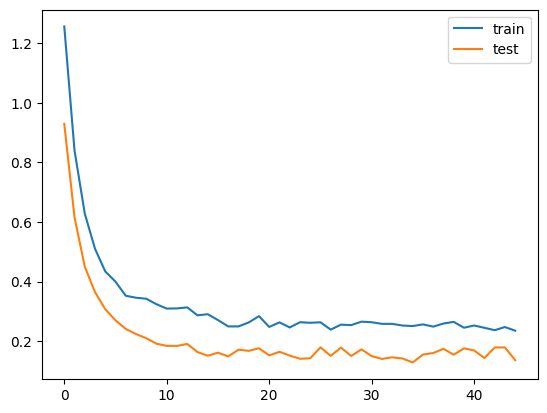

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label = 'train')
plt.plot(history.history['val_loss'],label = 'test')
plt.legend()

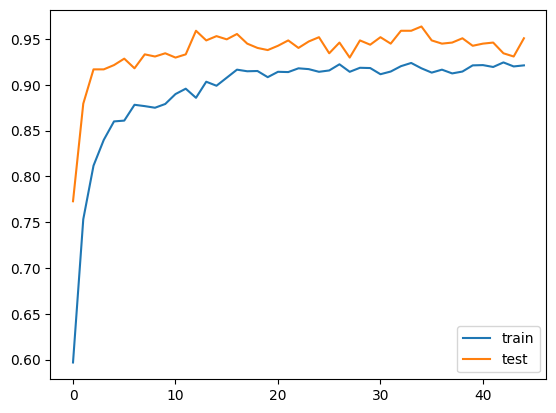

In [33]:
plt.plot(history.history['accuracy'],label = 'train')
plt.plot(history.history['val_accuracy'],label = 'test')
plt.legend()

### EVALUATE THE MODEL


In [34]:
y_log = model.predict(X_test_scaled)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [35]:
y_log

array([[9.92821455e-01],
       [4.54825722e-02],
       [9.89323378e-01],
       [3.56956571e-02],
       [1.75018702e-02],
       [2.26849094e-02],
       [1.92475263e-02],
       [9.70462024e-01],
       [7.30664060e-02],
       [9.55769300e-01],
       [9.58239496e-01],
       [1.98804829e-02],
       [1.85982697e-02],
       [9.64496315e-01],
       [9.88698900e-01],
       [2.75459196e-02],
       [5.36008514e-02],
       [2.90661514e-01],
       [3.49470854e-01],
       [9.89852726e-01],
       [1.23360731e-01],
       [9.95476604e-01],
       [9.89821196e-01],
       [9.89419162e-01],
       [1.47323925e-02],
       [1.75890326e-02],
       [1.22522784e-03],
       [6.38113320e-02],
       [4.12854552e-03],
       [9.87738132e-01],
       [2.61408817e-02],
       [9.92360830e-01],
       [8.80389214e-01],
       [4.60493937e-02],
       [9.98234332e-01],
       [9.86233711e-01],
       [3.62036452e-02],
       [3.04949805e-02],
       [8.90108000e-04],
       [9.94024694e-01],


In [39]:
y_pred = (y_log > 0.5 ).astype(int)

In [40]:
y_pred

array([[1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.9508196721311475

### SAVE THE MODEL FOR FURTHER DEPLOYMENT IN STREAMLIT

In [43]:
# save model
model.save('loan_model.h5')


# save scaler
import pickle
with open('scaler.pkl' , 'wb') as f:
    pickle.dump(sc , f)